In [1]:
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("/home/vivek/Documents/MachineLearning/SpamDetection/spam.csv", encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1, inplace = True)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.rename(columns={'v1':'label','v2':'msg'}, inplace=True)
df.head()

,label,msg
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [6]:
df['label']=df['label'].map({'ham':0,'spam':1})
df.head()

,label,msg
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


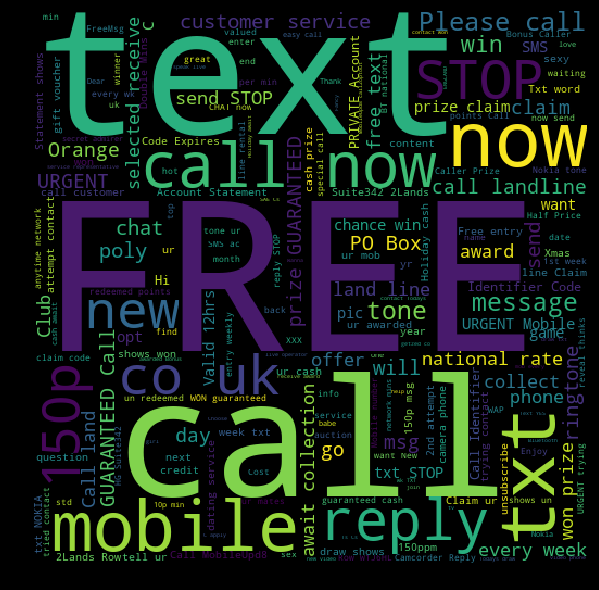

In [7]:
spam_words = ' '.join(list(df[df['label'] == 1]['msg']))
spam_wc = WordCloud(width = 512,height = 512).generate(spam_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(spam_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

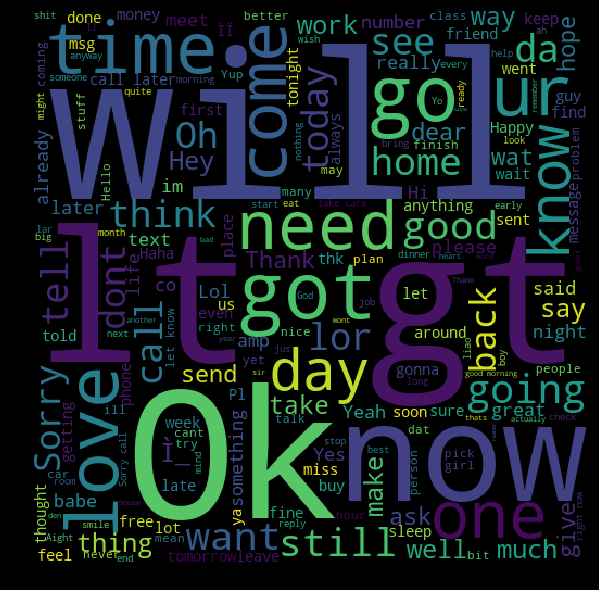

In [8]:
ham_words = ' '.join(list(df[df['label'] == 0]['msg']))
ham_wc = WordCloud(width = 512,height = 512).generate(ham_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(ham_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

In [9]:
X=df['msg']
y=df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [10]:
cv=TfidfVectorizer(min_df=1,stop_words='english')

In [11]:
X_traincv=cv.fit_transform(X_train)
X_testcv=cv.transform(X_test)

/usr/local/lib/python2.7/dist-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [12]:
a=X_traincv.toarray()
a

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [13]:
a[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [14]:
cv.inverse_transform(a[0])

[array([u'baby', u'didnt', u'jontin', u'know', u'meant', u'oh', u'ok',
        u'yep'], dtype='<U28')]

In [15]:
X_train.iloc[0]

u'Oh ok i didnt know what you meant. Yep i am baby jontin'

In [16]:
cf=MultinomialNB()

In [17]:
cf.fit(X_traincv,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [18]:
pred=cf.predict(X_testcv)

In [19]:
pred

array([0, 0, 0, ..., 0, 1, 0])

In [20]:
actual=np.array(y_test)
actual

array([0, 0, 0, ..., 0, 1, 0])

In [21]:
count=0
for i in range (len(pred)):
    if pred[i]==actual[i]:
        count+=1

In [22]:
count

1625

In [23]:
len(pred)

1672

In [24]:
accuracy=(1635/1672.0)*100
accuracy

97.78708133971293

In [25]:
confusion_matrix(actual, pred)

array([[1450,    0],
       [  47,  175]])